In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

#	B. Señales análogas y digitales



*   Una señal es **análoga** si su variable dependiente puede tomar **infinitos valores**. 
*   Una señal es **digital** si su variable dependiente sólo puede tomar **finitos valores**.

En el siguiente bloque se define la función de conversión Análogo a Digital

In [ ]:
def adc(f,n,fs=1,xmin=-1,xmax=1,m=2):
  # f: señal continua
  # n: vector de muestras enteras [0, 4, 90, 105]
  # fs: frecuencia de muestreo
  # xmin: amplitud mínima del cuantizador
  # xmax: amplitud máxima del cuantizador
  # m : longitud de las palabras binarias
  
  #Normalizamos entre 0 y 2^m
  fn = np.minimum(np.maximum((2**m)*(f(n/fs)-xmin)/(xmax-xmin),0),2**m)

  #fq es un sumador
  fq = 0
  #Recorremos desde el bit más significativo hasta el menos. Ej, 16,8,4,2,1
  for b in reversed(range(1,m+1)):
    #Si la señal es mayor que lo que 2**b, se debe incluir ese bit. Si no, no se cuenta. 
    fq += (fn>=2**b)*2**b
    #Se toma el residuo respecto del bit actual para el próximo bit menos significativo
    fn = np.mod(fn,(2**b))
  return fq
  

A continuación se propone una señal continua, se discretiza y se cuantiza:

In [ ]:
def myfun(fs, xmin,xmax,m):

  f = lambda t: np.cos(2*np.pi*t)

  t = np.linspace(0,1,1000)
  n = np.arange(100)

  xq = adc(f,n,fs=fs,xmin=xmin,xmax=xmax,m=m)
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,2)
  plt.stem(n/fs,xq)
  #plt.xlim([0,3])
  plt.ylim([0,2**m +1])

  plt.subplot(1,2,1)
  plt.plot(t,f(t))

  plt.show()

In [ ]:
interactive_plot = interactive(myfun, fs=(1,120,1), xmin=(-2.0, 0.0,0.01), xmax=(0, 2,0.01),m=(1,16,1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=60, description='fs', max=120, min=1), FloatSlider(value=-1.0, descripti…

([<matplotlib.axis.XTick at 0x7f6a8d05e590>,
 <a list of 21 Text major ticklabel objects>)

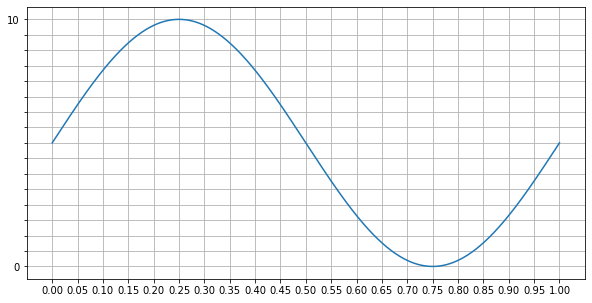

In [ ]:
t = np.linspace(0,1,1000)
x = 5*np.sin(2*np.pi*t)+5
plt.figure(figsize=(10,5))
plt.plot(t,x)
plt.grid()
plt.yticks(np.linspace(0,10,17),[0,'','','','','','','','','','','','','','','',10])
plt.xticks(np.linspace(0,1,21))